# Diamond Price Prediction : Complete Project

# UPVOTE if you like my project :)
You can visit my other works at [kaggle](https://www.kaggle.com/sagnik1511/notebooks)  or [github](https://github.com/sagnik1511?tab=repositories).

This project is based on analysis and prediction of diamonds.
In these days diamonds are very costly , so the buyer can face difficulties or abrupt changes in prices.
Using this project they can find the best diamon for their utility.
This project is made with ❤️.

# Libraries :
In this project we are using the classical process rather than NN , so we are not importing **tensorflow** or **pytorch**.


In [2]:

# supporting libraries -----------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import re

# for data processing ------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import*

# for prediction (machine learning models) ---------------------

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*
import xgboost as xgb

# Data Gathering and Primary Visualization:
We are using the [*read_csv*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function of [*pandas*](https://pandas.pydata.org/) to make the dataframe and visualize it.

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diamonds/diamonds.csv


In [4]:
df=pd.read_csv('/kaggle/input/diamonds/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


We can see there are -
1. 2 **Integer** type features
2. 6 **Float** type features.
3. 3 **Object** type features.

So, we have to encode those categorical features as we can feed only numerical features into the machine learning model.

We are manually encoding those features.

**Feature : CUT**

In [6]:
cut=df['cut'].value_counts().index
k=0
for i in cut:
    df['cut'].replace(i,k,inplace=True)
    k+=1
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Feature : COLOR**

In [7]:
color=df['color'].value_counts().index
k=0
for i in color:
    df['color'].replace(i,k,inplace=True)
    k+=1
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,6,SI2,63.3,58.0,335,4.34,4.35,2.75


**Feature : CLARITY**

In [8]:
clarity=df['clarity'].value_counts().index
k=0
for i in clarity:
    df['clarity'].replace(i,k,inplace=True)
    k+=1
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75


Total dataframe has been encoded. 

### Leakagae Processing :
If there is leakage in the data , we can follow these steps -

     1. If there are no leakage then we should skip to next steps.
     2. If there are less leakage then we should fill those with a very small number e.g. -99999.
     3. If there are moderate number of leakagaes then we can fill those with th mean of the feature.
     4. If there are only or too much leakage then it is best to drop or omit the feature.

In [9]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

The dataset is quite good as there are no leakages. So, we can proceed further.

In [10]:
df.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,1.095903,2.314627,2.032351,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.116600,1.820448,1.790676,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,0.000000,1.000000,1.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,1.000000,2.000000,2.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,2.000000,4.000000,3.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


As we have seen in the [data description](https://www.kaggle.com/shivam2503/diamonds) that 
              
              Depth Percentage (D) = z/mean(x,y)
              
                                   = z/{(x+y)/2}
                                   
                                   = (2*z)/(x+y)

In [11]:
depth_percentage=[]
for i in range(len(df)):
    depth_percentage.append((2*df['z'][i])/(df['x'][i]+df['y'][i]))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
len(depth_percentage)

53940

So we can drop the features 'x','y','z' and then concatenate the depth percentage .

In [13]:
df.drop(labels=['x','y','z'],axis=1,inplace=True)
depth_percentage=pd.DataFrame({'depth_percentage':depth_percentage})
df=pd.concat([df,depth_percentage],axis=1)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,depth_percentage
0,1,0.23,0,1,2,61.5,55.0,326,0.612863
1,2,0.21,1,1,0,59.8,61.0,326,0.597671
2,3,0.23,3,1,3,56.9,65.0,327,0.568966
3,4,0.29,1,5,1,62.4,58.0,334,0.623962
4,5,0.31,3,6,2,63.3,58.0,335,0.632911


# EDA : Exploratory Data Analysis

So ,we can see there is depth and depth percentage which looks similar. so we can check if they are similar or not.
If found similar then we can drop a single feature.

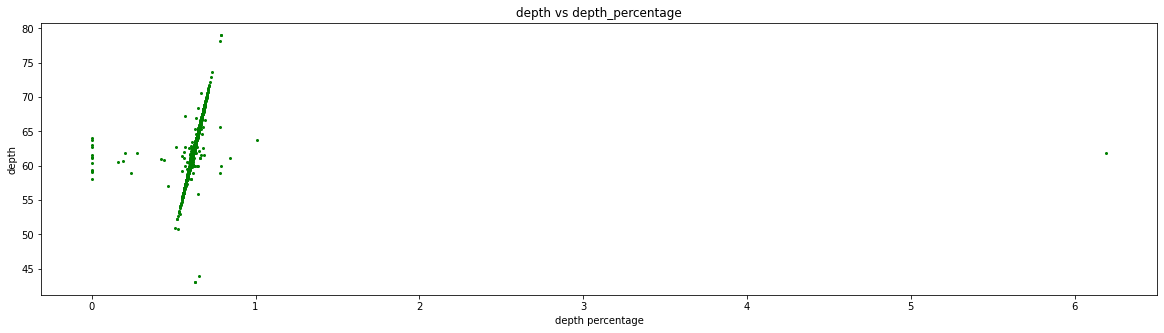

In [14]:
plt.figure(figsize=(20,5))
plt.title('depth vs depth_percentage')
plt.xlabel('depth percentage')
plt.ylabel('depth')
plt.scatter(df['depth_percentage'],df['depth'],s=4,color='g')
plt.show()

So depth and depth percentage shows similar behaviour. So we are omiting depth_percentage for dimensionality reduction.

In [15]:
df.drop('depth_percentage',1,inplace=True)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price
0,1,0.23,0,1,2,61.5,55.0,326
1,2,0.21,1,1,0,59.8,61.0,326
2,3,0.23,3,1,3,56.9,65.0,327
3,4,0.29,1,5,1,62.4,58.0,334
4,5,0.31,3,6,2,63.3,58.0,335


Now we are going to see the correlation of the continuous features with the *price* feature using [*matplotlib.pyplot.scatter*](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html)

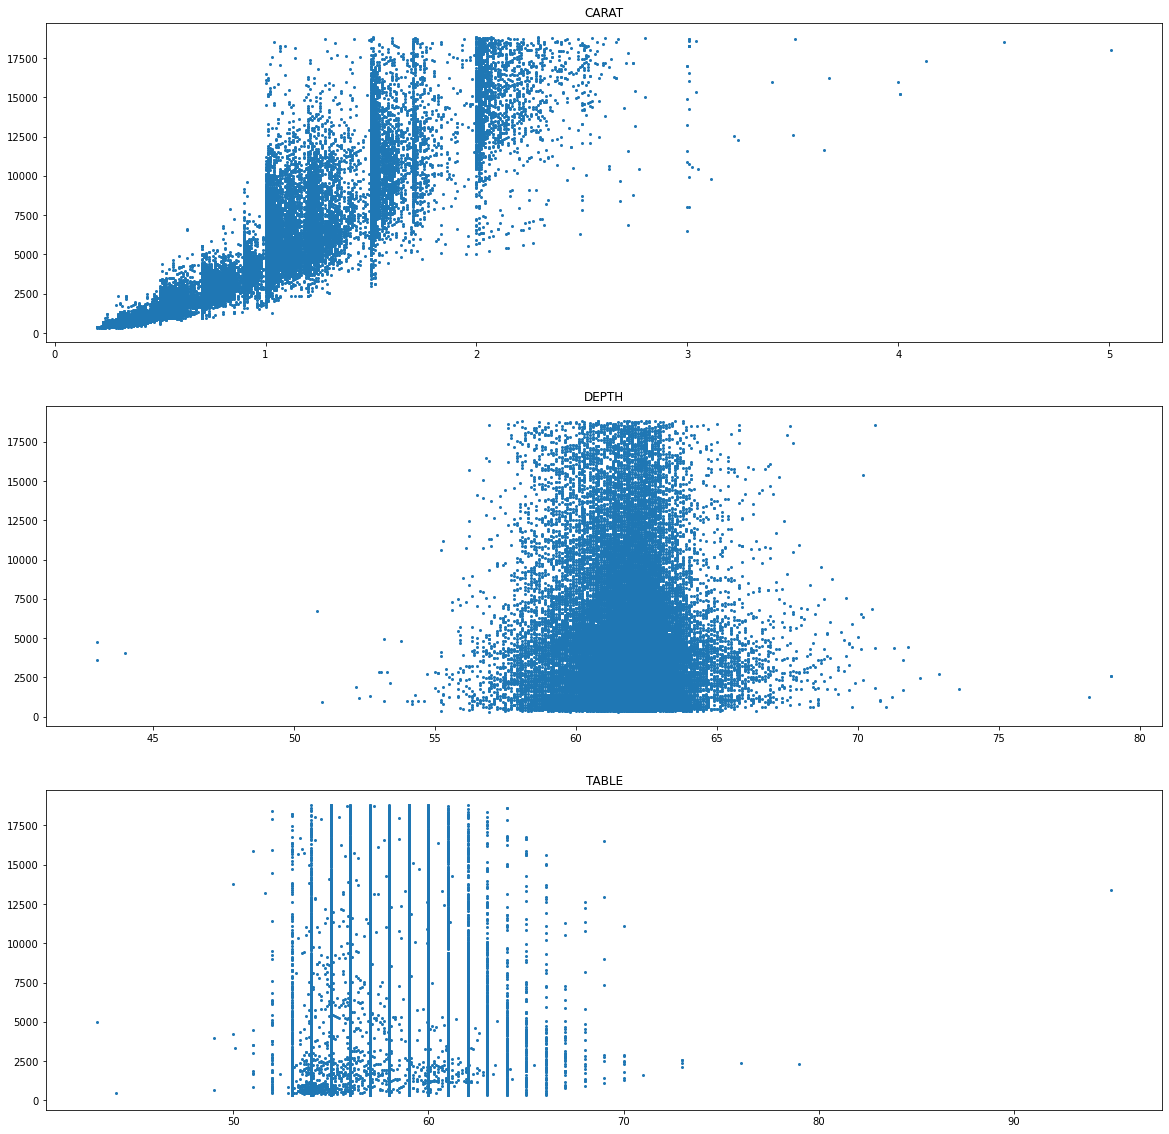

In [16]:
fig, axs = plt.subplots(3,1,figsize=(20,20))
plt.subplot(3,1,1)
plt.title('CARAT')
plt.scatter(df['carat'],df['price'],s=4)
plt.subplot(3,1,2)
plt.title('DEPTH')
plt.scatter(df['depth'],df['price'],s=4)
plt.subplot(3,1,3)
plt.title('TABLE')
plt.scatter(df['table'],df['price'],s=4)
# plt.show()

#### Conclusion :
* The continuous features are showing a similar graphical manner as gaussian distribution.
* The cotinuous features aren't complete continuous rather they have a wide range of values.
* The Carat is found presenting a direct proportional behaviour with the price . It is also a reminder that the data isn't shuffled well.
* The Depth feature is seen forming a pyramidal shape with the price feature showing a singular point of depth is more valuable.

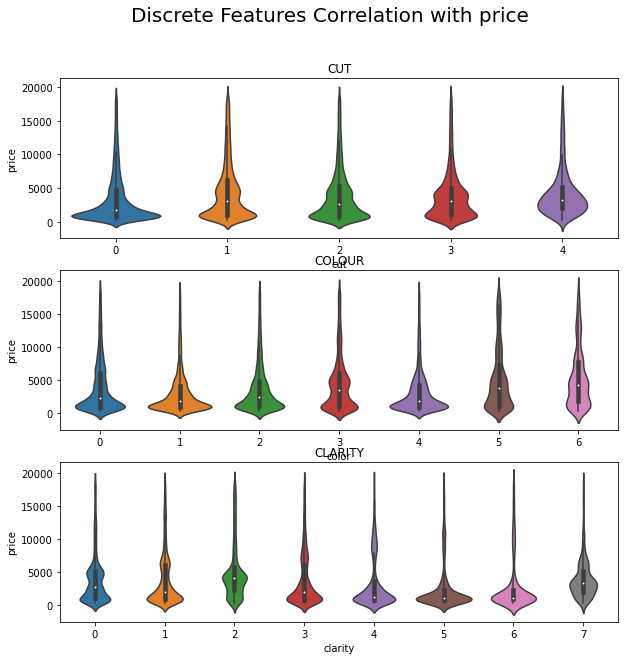

In [17]:

fig, axs = plt.subplots(3,1,figsize=(10,10))
fig.suptitle('Discrete Features Correlation with price',fontsize=20)
plt.subplot(3,1,1)
plt.title('CUT')
sns.violinplot(x="cut", y="price", data=df)
plt.subplot(3,1,2)
plt.title('COLOUR')
sns.violinplot(x="color", y="price", data=df)
plt.subplot(3,1,3)
plt.title('CLARITY')
sns.violinplot(x="clarity", y="price", data=df)

#### Conclusion:
* This graphs are showing that the number of features make the violin plots wider and smaller cause heavy number of points hold different values and thus the mean of the plot boils down.
* The colour and cut are directly proportionate and the clarity is inversely proportionate.

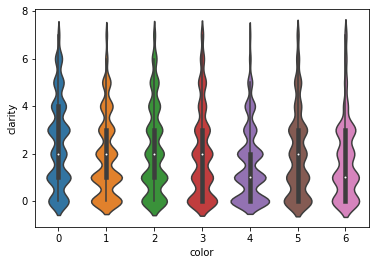

In [18]:
sns.violinplot(x='color',y='clarity',data=df)

Here we can see the clarity is also inversely proportionate with the colour.

In [19]:
df=df.sample(frac=1)

As the featureset is in a pattern we have to shuffle the dataset and that will help us find a better prediction.

# Final Data Preparation :
1. At first we have to create the X and Y .
2. Then we have to split the X and y into train and validation.
   In this project we are performing a 80%-20% train-test split.

In [20]:
X=df.drop('price',1)
y=df['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((43152, 7), (10788, 7), (43152,), (10788,))

# Model Creating, Fitting and Evaluation :
At first we are going to chcek the model with the Unnamed :0 feature. 
After that we are going to check omitting that feature.

In [21]:
model=RandomForestRegressor(random_state=0)
model.fit(X_train,y_train)
y_1=model.predict(X_train)
print('RMSE in train data :',np.sqrt(mean_squared_error(y_train,y_1)))
y_pred=model.predict(X_test)
print('RMSE in test data :',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE in train data : 10.667275042359574
RMSE in test data : 15.988252090898984


In [22]:
print('R-squared score of the model on train data is : ',model.score(X_train,y_train))

R-squared score of the model on train data is :  0.9999928433541474


In [23]:
print('R-squared score of the model on test data is : ',model.score(X_test,y_test))

R-squared score of the model on test data is :  0.9999839962104917


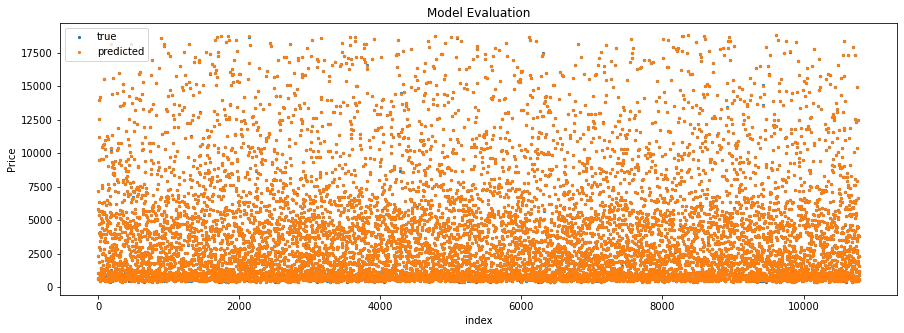

In [24]:
plt.figure(figsize=(15,5))
plt.title('Model Evaluation')
plt.scatter(range(0,len(X_test)),y_test,label='true',s=5)
plt.scatter(range(0,len(X_test)),y_pred,label='predicted',s=5)
plt.xlabel('index')
plt.ylabel('Price')
plt.legend()
plt.show()

We can see that maximum of 5 lue points are visible , this indicates that the model really is well-tuned.

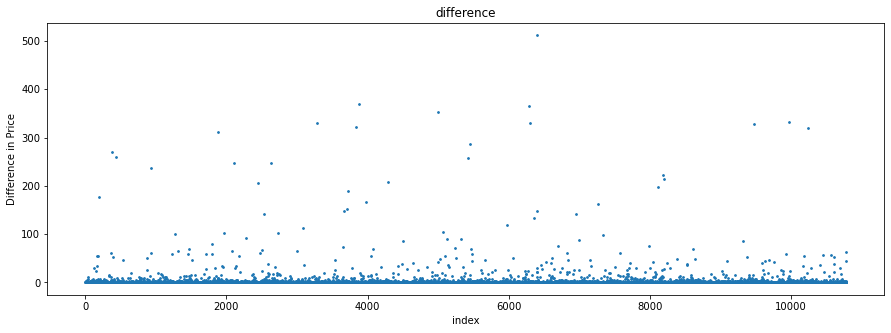

In [25]:
difference=abs(y_test-y_pred)
plt.figure(figsize=(15,5))
plt.title('difference')
plt.scatter(range(0,len(difference)),difference,s=3)
plt.xlabel('index')
plt.ylabel('Difference in Price')
plt.show()

Most of the points are bounded with ground line showing a very good prediction.

In [26]:
X_train.drop('Unnamed: 0',1,inplace=True)
X_test.drop('Unnamed: 0',1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
model=RandomForestRegressor(random_state=0)
model.fit(X_train,y_train)
y_1=model.predict(X_train)
print('RMSE in train data :',np.sqrt(mean_squared_error(y_train,y_1)))
y_pred=model.predict(X_test)
print('RMSE in test data :',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE in train data : 212.28121865843374
RMSE in test data : 538.8591763193117


In [28]:
print('R-squared score of the model on train data is : ',model.score(X_train,y_train))
print('R-squared score of the model on test data is : ',model.score(X_test,y_test))

R-squared score of the model on train data is :  0.9971658313814251
R-squared score of the model on test data is :  0.9818209400459009


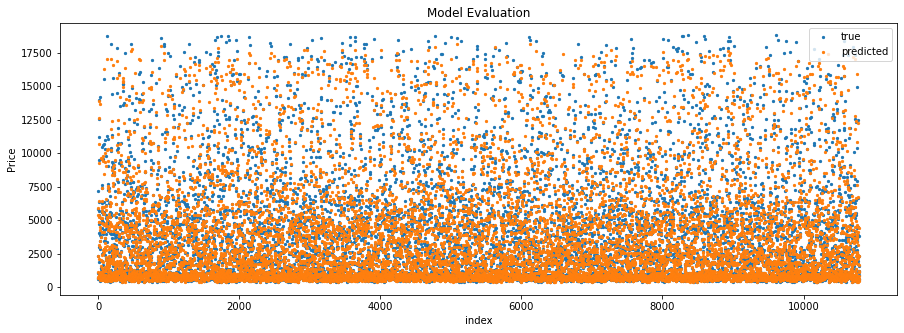

In [29]:
plt.figure(figsize=(15,5))
plt.title('Model Evaluation')
plt.scatter(range(0,len(X_test)),y_test,label='true',s=5)
plt.scatter(range(0,len(X_test)),y_pred,label='predicted',s=5)
plt.xlabel('index')
plt.ylabel('Price')
plt.legend()
plt.show()

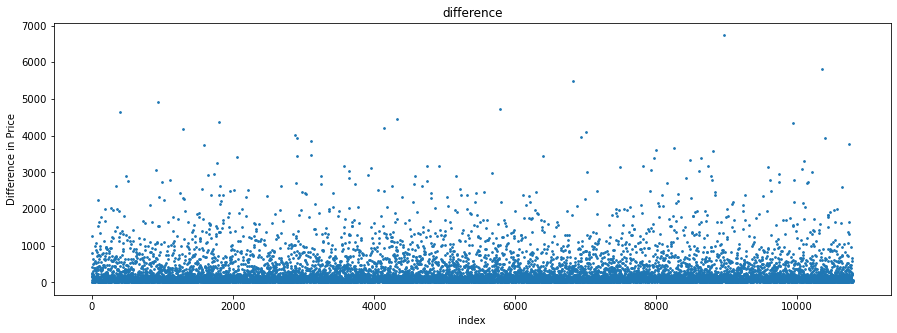

In [30]:
difference=abs(y_test-y_pred)
plt.figure(figsize=(15,5))
plt.title('difference')
plt.scatter(range(0,len(difference)),difference,s=3)
plt.xlabel('index')
plt.ylabel('Difference in Price')
plt.show()

The model gives 99.998 % accuracy when 'Unnamed :0' is present.
The model gives 98.182 % accuracy when 'Unnamed :0' is present.

# Final Conclusion :

 As we have seen here that the model accuracy decrease when the ***Unnamed :0*** feature is omitted . So , we can say that the price is also dependable on that feature and can't be taken out if any other prediction happens in future.

### Hurrah !  We've completed the project. 
If you find any queries or want to give any feedback please contact me over my email.

**Email** : *sagnik.jal00@gmail.com*

Or you can contact me over **discord** -***'s_agnik1511#6085'***



# Thank You :)